# Laplacian Associative Memory (LAM) - DEV 10

[Multiscale representations of community structures in attractor neural networks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8412329/pdf/pcbi.1009296.pdf) (2021)

- Gabor

In [1]:
from nn import LAM
import libtools

In [2]:
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# np.random.seed(123)

In [4]:
src = np.load('../data/mat/SOM_orient_v1.npy')
src = libtools.downsample(src, 4)

(51, 51)
Theta θ | min: 0.0012 max: 6.282


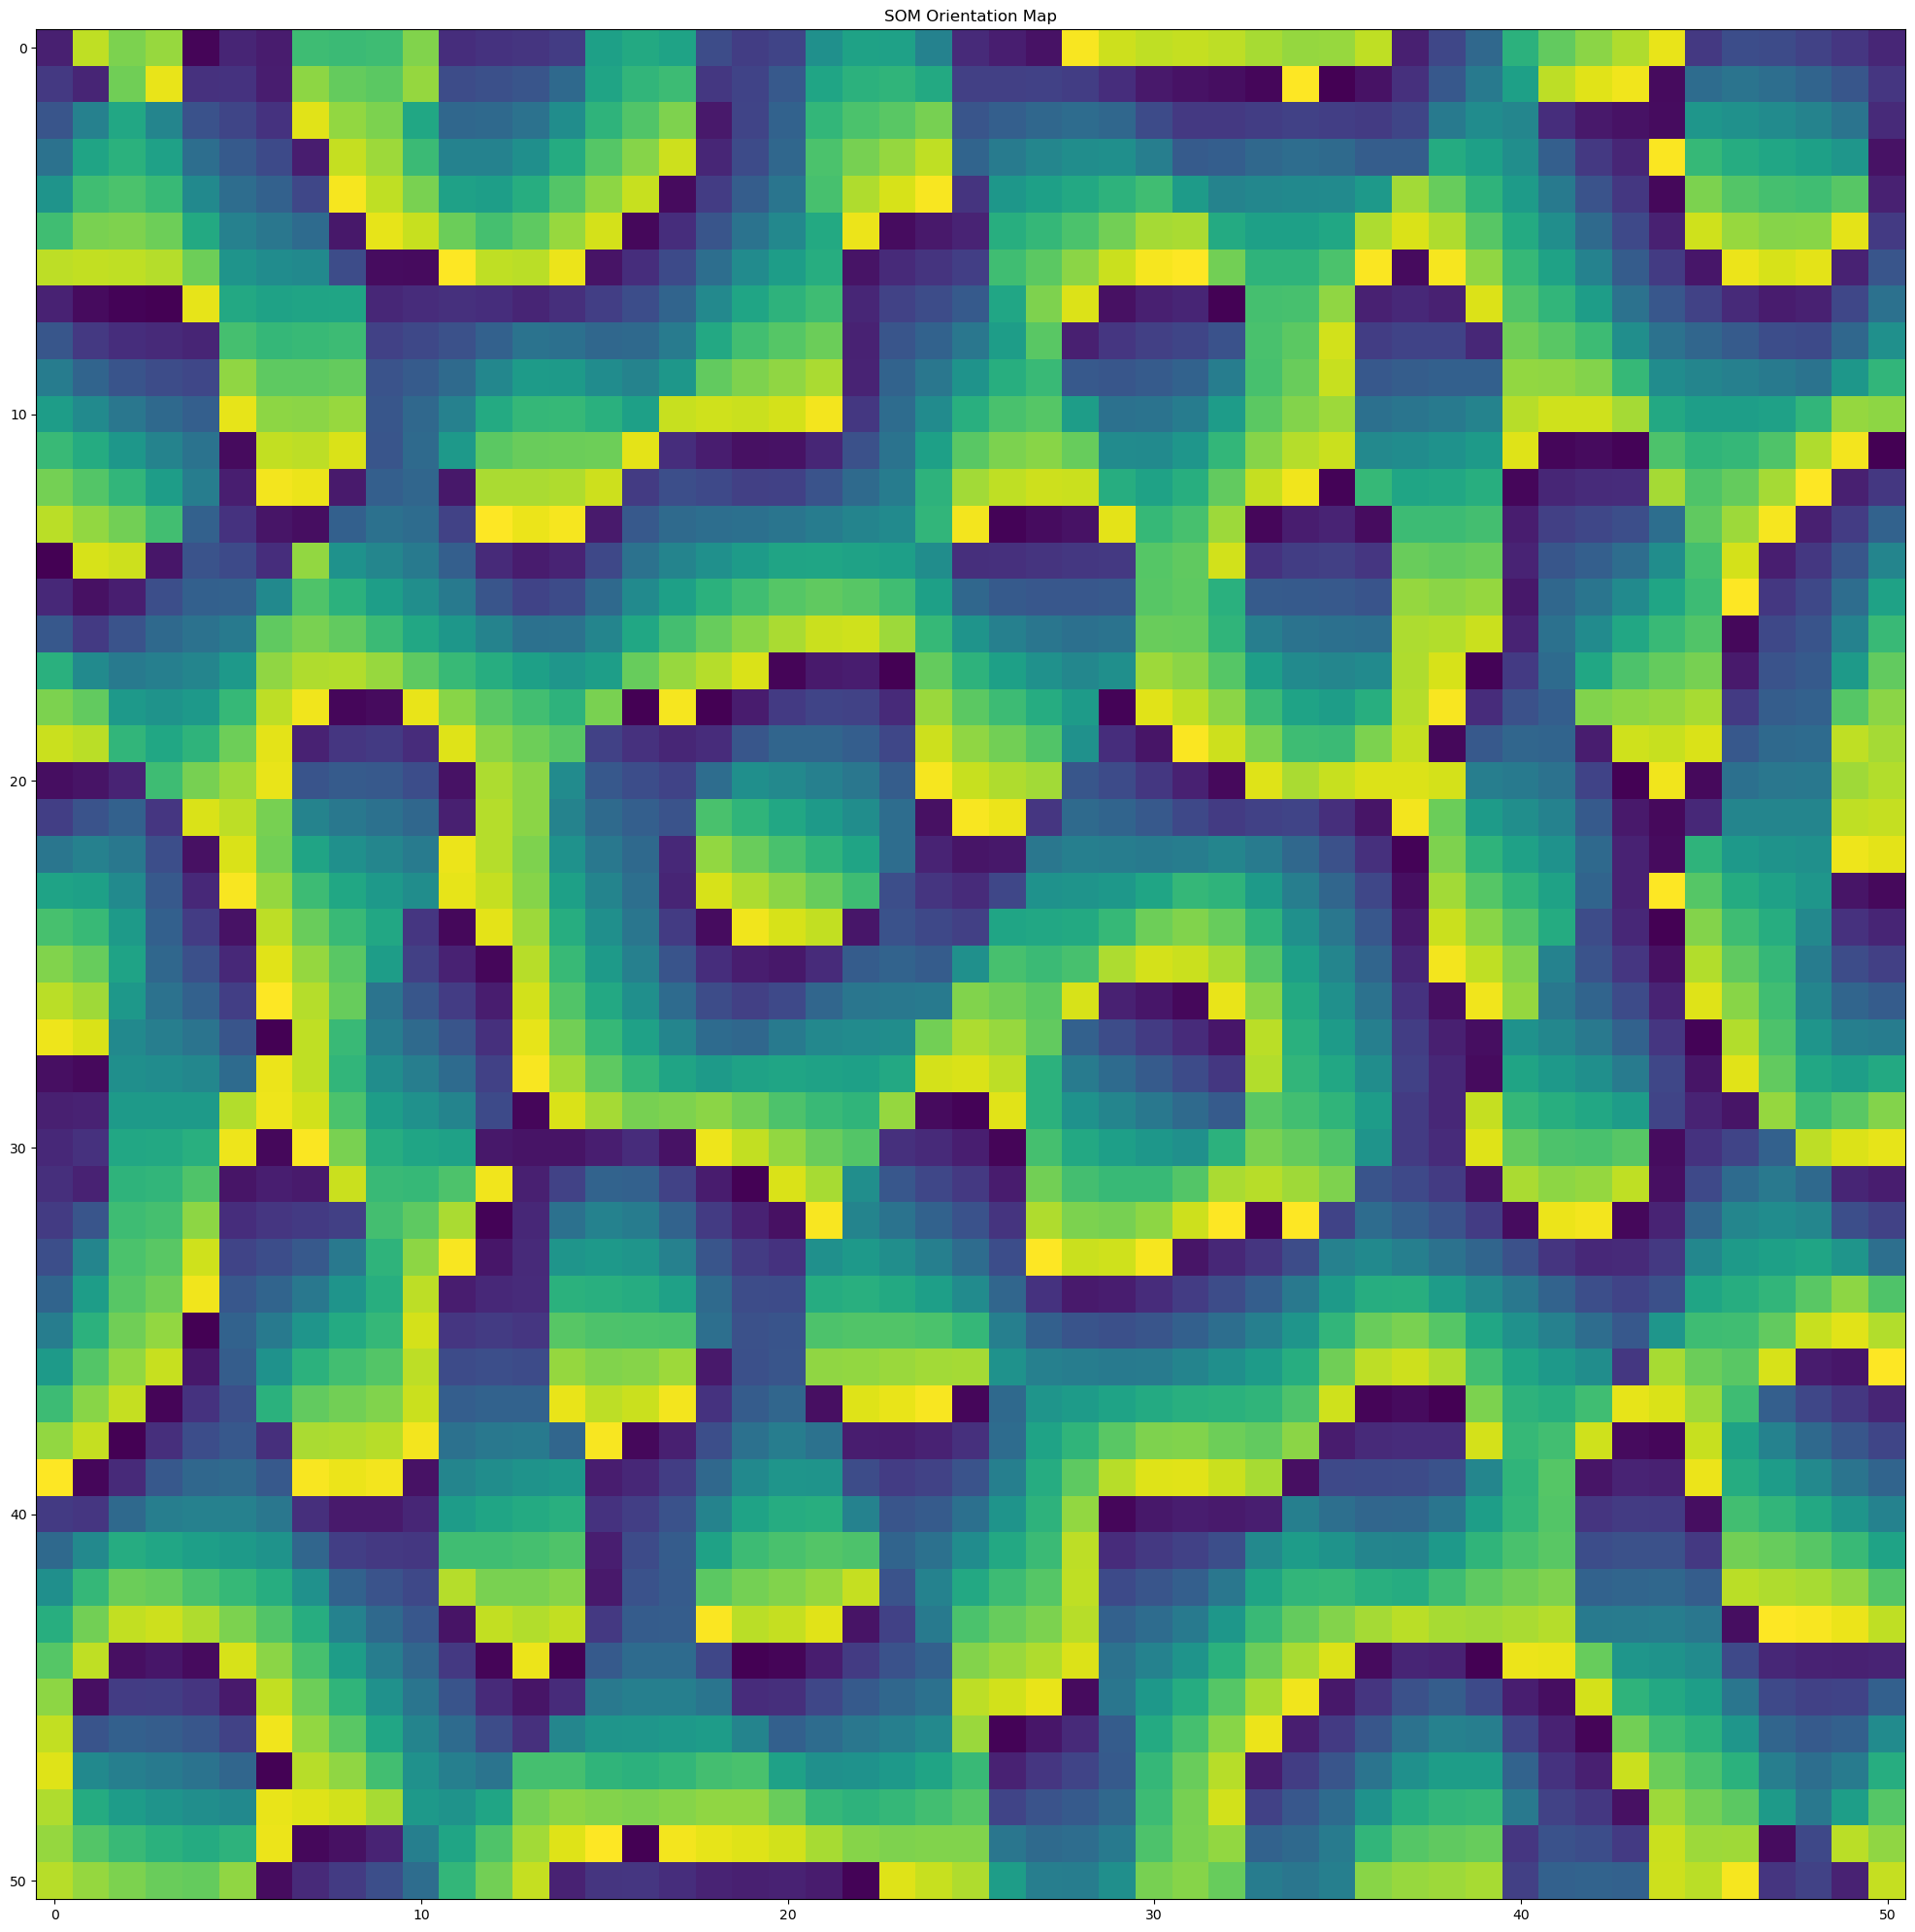

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(src)
plt.title('SOM Orientation Map')
plt.tight_layout()

print(src.shape)
print('Theta θ | min:', round(src.min(),4), 'max:', round(src.max(),4))

---

### ANGULAR COMPONENT

In [13]:
for i in range(src.shape[0]):
    for j in range(src.shape[1]):
        print(src[i][j])

0.5429365814126359
5.670794452826325
5.049951432474385
5.313773309053712
0.09461051441694401
0.6403529478737902
0.47638972083052655
4.324879240247814
4.274301391329084
4.33143966397693
5.096471674376592
0.8195760823730582
0.9278282610170248
0.9789357298428216
1.1193950489606381
3.5709630582191063
3.8183707793222723
3.649756620212244
1.453068514082152
1.130659807102118
1.2956123912079371
3.152089750231031
3.6144734964567067
3.5914118287439742
2.7934661094213675
0.7558768451103277
0.5343620269268143
0.3009078537509886
6.21818784086172
5.811262502805614
5.66913348582608
5.721719880265519
5.6608026494874135
5.46192898808861
5.297824602595248
5.300843730313982
5.669333072595936
0.5487296653936453
1.3506002748857457
2.135345496472701
4.034371642695488
4.7694075261329925
5.187286339988091
5.538968164838133
6.078078820904488
1.039968453849915
1.4733746353947426
1.427250371349134
1.237348191226708
0.9973025994224494
0.6643603103149842
1.0331743609071768
0.6511700335386048
4.928042878419607
6.07

---

### COMPUTE GRAPH

In [6]:
N = 4096                                                         # Neurons | Default: 30000
prob = 0.1                                                       # Sparsity
eta = 0.01                                                       # Epsilon / Learning rate
epochs = 3000                                                    # Steps
gamma = 0.6                                                      # Inhibition ratio
norm_mode = 'asym'                                               # Asymmetric Normalisation

P = src.shape[0] * src.shape[1]                                  # Nodes

start_node = int(int(src.shape[0]/2) * src.shape[1] + int(src.shape[0]/2))
print('Start node:', start_node)

rad = 5
sigmaX = 4.0
sigmaA = 1.0

Start node: 1300


In [7]:
W = libtools.construct_SOAM(src, rad, sigmaX, sigmaA)

_, v = libtools.GL_eigen(W, 'asym')

graph = LAM(N, P, prob, W, gamma, "asym")
alpha = -0.9; graph._set_weight(alpha)
m_log, obj_log = graph.simulate_single(alpha, eta, epochs, start_node)
m = m_log[-1,:]

Text(0.5, 1.0, 'SOAM | alpha=-0.9')

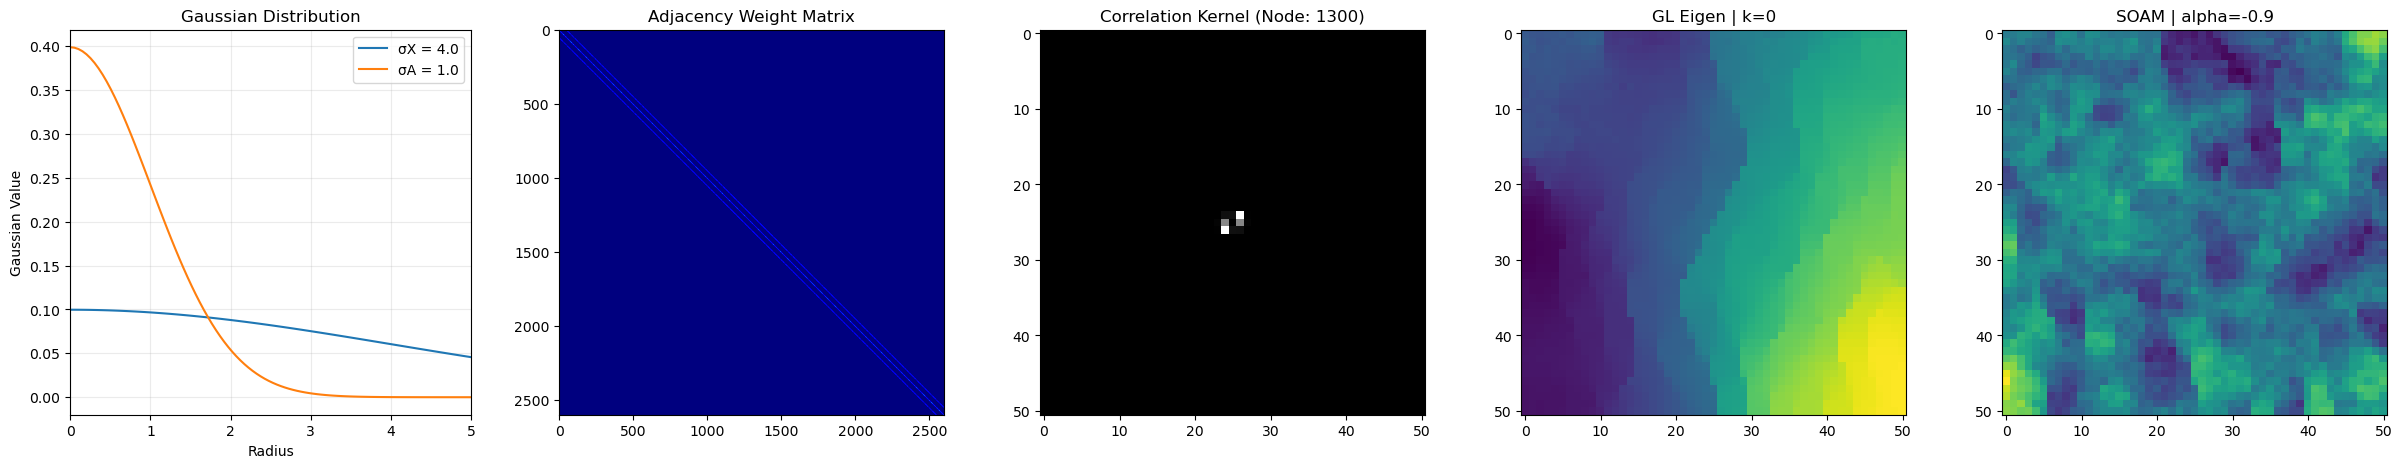

In [8]:
plt.figure(figsize=(30,5))
plt.subplot(1, 5, 1)
dist = np.linspace(0, rad, 100)
plt.plot(dist, libtools.gaussian(dist, sigmaX), label=f'σX = {sigmaX}')
plt.plot(dist, libtools.gaussian(dist, sigmaA), label=f'σA = {sigmaA}')
plt.title('Gaussian Distribution')
plt.xlabel('Radius'), plt.ylabel('Gaussian Value')
plt.xlim([0, rad]), plt.grid(alpha=0.25), plt.legend()

plt.subplot(1, 5, 2)
plt.imshow(W, 'jet')
plt.title('Adjacency Weight Matrix')

plt.subplot(1, 5, 3)
plt.imshow(W[start_node].reshape(src.shape), 'gray')
plt.title('Correlation Kernel (Node: ' + str(start_node) + ')')

plt.subplot(1, 5, 4)
k = 0
plt.imshow(v[:,k].reshape(src.shape), vmin=np.min(v[:,k]), vmax=np.max(v[:,k]))
plt.title('GL Eigen | k='+ str(k))

plt.subplot(1, 5, 5)
plt.imshow(m.reshape(src.shape), vmin=np.min(m), vmax=np.max(m))
plt.title('SOAM | alpha=' + str(alpha))